# Imports

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from skimage import io

# Task 1

## PCA Method

In [133]:
df = pd.read_csv('data/drug200.csv')

In [134]:
from sklearn.preprocessing import LabelEncoder


#function to label
def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])


#create a list of data needed to be labeled
categories = ['Sex', 'BP', 'Cholesterol', 'Drug']

for label in categories:
    label_encoder(label)

In [135]:
X = df.drop('Drug', axis=1)
Y = df['Drug']

t = StandardScaler()
X_t = t.fit_transform(X)


In [136]:
pca = PCA(n_components=2, svd_solver='full')
x_pca = pca.fit_transform(X_t, )

C:\Users\Alexander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

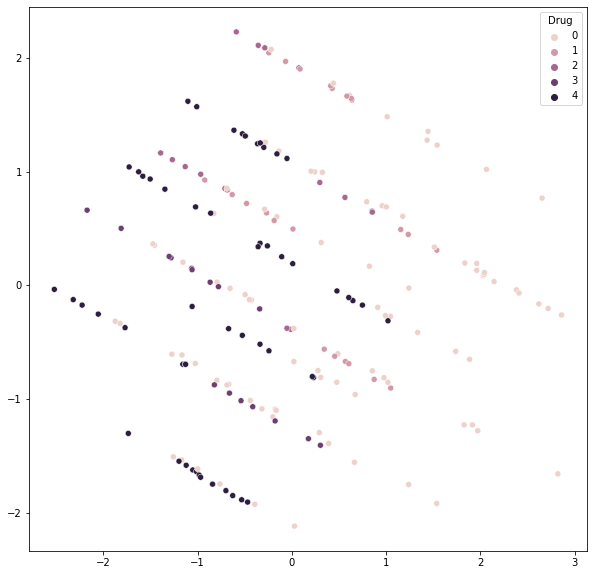

In [137]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x_pca[:, 0], x_pca[:, 1], hue=Y)

In [138]:
pca.explained_variance_

array([1.29836642, 1.0817823 ])

In [139]:
pca.explained_variance_ratio_


array([0.25837492, 0.21527468])

## TSNE Method

In [140]:
ts = TSNE(n_components=2, init="pca", learning_rate='auto')
x_tsne = ts.fit_transform(X)

C:\Users\Alexander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


C:\Users\Alexander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

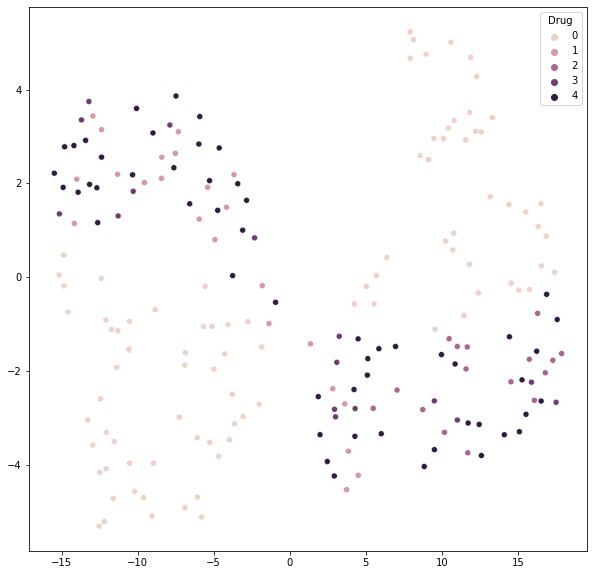

In [141]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x_tsne[:, 0], x_tsne[:, 1], hue=Y)

In [142]:
x_tsne.shape

(200, 2)

# Task 2

In [143]:
n_colors = 8

img = io.imread("image.jpg")
print(img.shape)

(333, 450, 3)


In [145]:
w, h, d = original_shape = tuple(img.shape)

In [146]:
assert d == 3
image_array = np.reshape(img, (w * h, d))

In [147]:
from sklearn.utils import shuffle

print("Fitting model on a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

Fitting model on a small sub-sample of the data


In [148]:
from sklearn.metrics import pairwise_distances_argmin

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

In [149]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

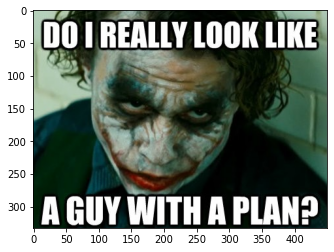

In [150]:
plt.imshow(img)

## 64 Levels

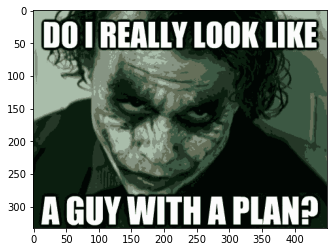

In [151]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 32 Levels

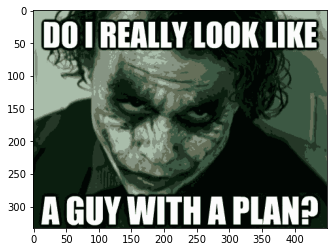

In [152]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 16 Levels

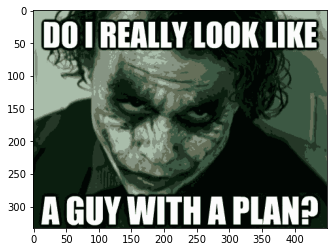

In [153]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 8 Levels

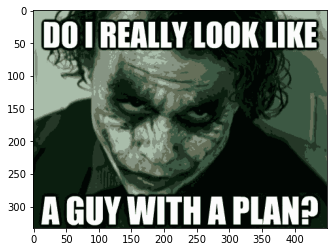

In [154]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 2 Levels

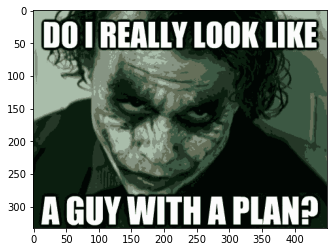

In [155]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

# Task 3

In [156]:
df1 = pd.read_csv('data/task3.csv')

In [157]:
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [158]:
df1.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [159]:
print(len(df1[df1.label == 0]), 'Non-Hatred Tweets')
print(len(df1[df1.label == 1]), 'Hatred Tweets')

14935 Non-Hatred Tweets
1117 Hatred Tweets


In [160]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [161]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
stopWords = stopwords.words('english')
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score # performance evaluation criteria

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Preprocessing column of a tweet

In [162]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [163]:
df1['normalized_text'] = df1.tweet.apply(normalizer)

### Gathering words with a hashtag for analysis

In [164]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [165]:
df1['hashtag'] = df1.tweet.apply(extract_hashtag)

In [166]:
df1.head()

,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


In [167]:
# All tweets
all_words = " ".join(df1.normalized_text)
#print(all_words)

In [168]:
# Hatred tweets
hatred_words = " ".join(df1[df1['label']==1].normalized_text)
#print(hatred_words)

### Все твиты cloudword

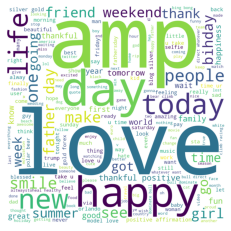

In [169]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Ненавистные твиты cloudword

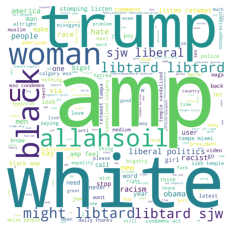

In [170]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(hatred_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Анализ слов

In [171]:
freq_all_hashtag = FreqDist(list((" ".join(df1.hashtag)).split())).most_common(10)
freq_hatred_hashtag = FreqDist(list((" ".join(df1[df1['label']==1]['hashtag'])).split())).most_common(10)


In [172]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
df_hatredhashtag = pd.DataFrame(freq_hatred_hashtag, columns=['words', 'frequency'])

In [173]:
print(df_allhashtag.head())

      words  frequency
0      love        785
1  positive        481
2     smile        302
3   healthy        278
4  thankful        249


In [174]:
print(df_hatredhashtag.head())

       words  frequency
0      trump         73
1  allahsoil         50
2   politics         49
3    libtard         40
4    liberal         40


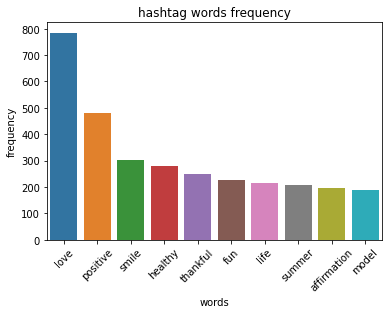

In [175]:
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

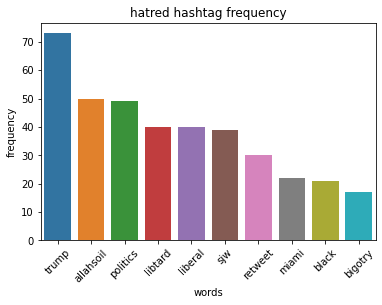

In [176]:
sns.barplot(x='words', y='frequency', data=df_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('hatred hashtag frequency')
plt.show()

In [181]:
corpus = []
for i in range(0,16052):
    corpus.append(df1['normalized_text'][i])
#print(corpus)

In [182]:
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)


CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [183]:
# creating dense matrix
X = cv.transform(corpus).toarray()
y = df1.iloc[:,1].values

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### TfidfVectorizer

In [185]:
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10, stop_words=stopwords.words('english'))
X1 = tfidf.fit_transform(corpus)

In [186]:
from sklearn.ensemble import RandomForestClassifier

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=42)

classifier2 =  RandomForestClassifier(n_estimators=200, max_depth=200).fit(X1_train, y1_train.astype(np.int64))

classifier2.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=200, n_estimators=200)

In [187]:
y1_pred = classifier2.predict(X1_test)
y1_prob = classifier2.predict_proba(X1_test)

In [188]:
print(f1_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

0.5384615384615384
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4934
           1       0.81      0.40      0.54       364

    accuracy                           0.95      5298
   macro avg       0.88      0.70      0.76      5298
weighted avg       0.95      0.95      0.94      5298

[[4899   35]
 [ 217  147]]


### LDA

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [190]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [191]:
df2 = df1["hashtag"]

In [192]:
n_components = 5
n_top_words = 10

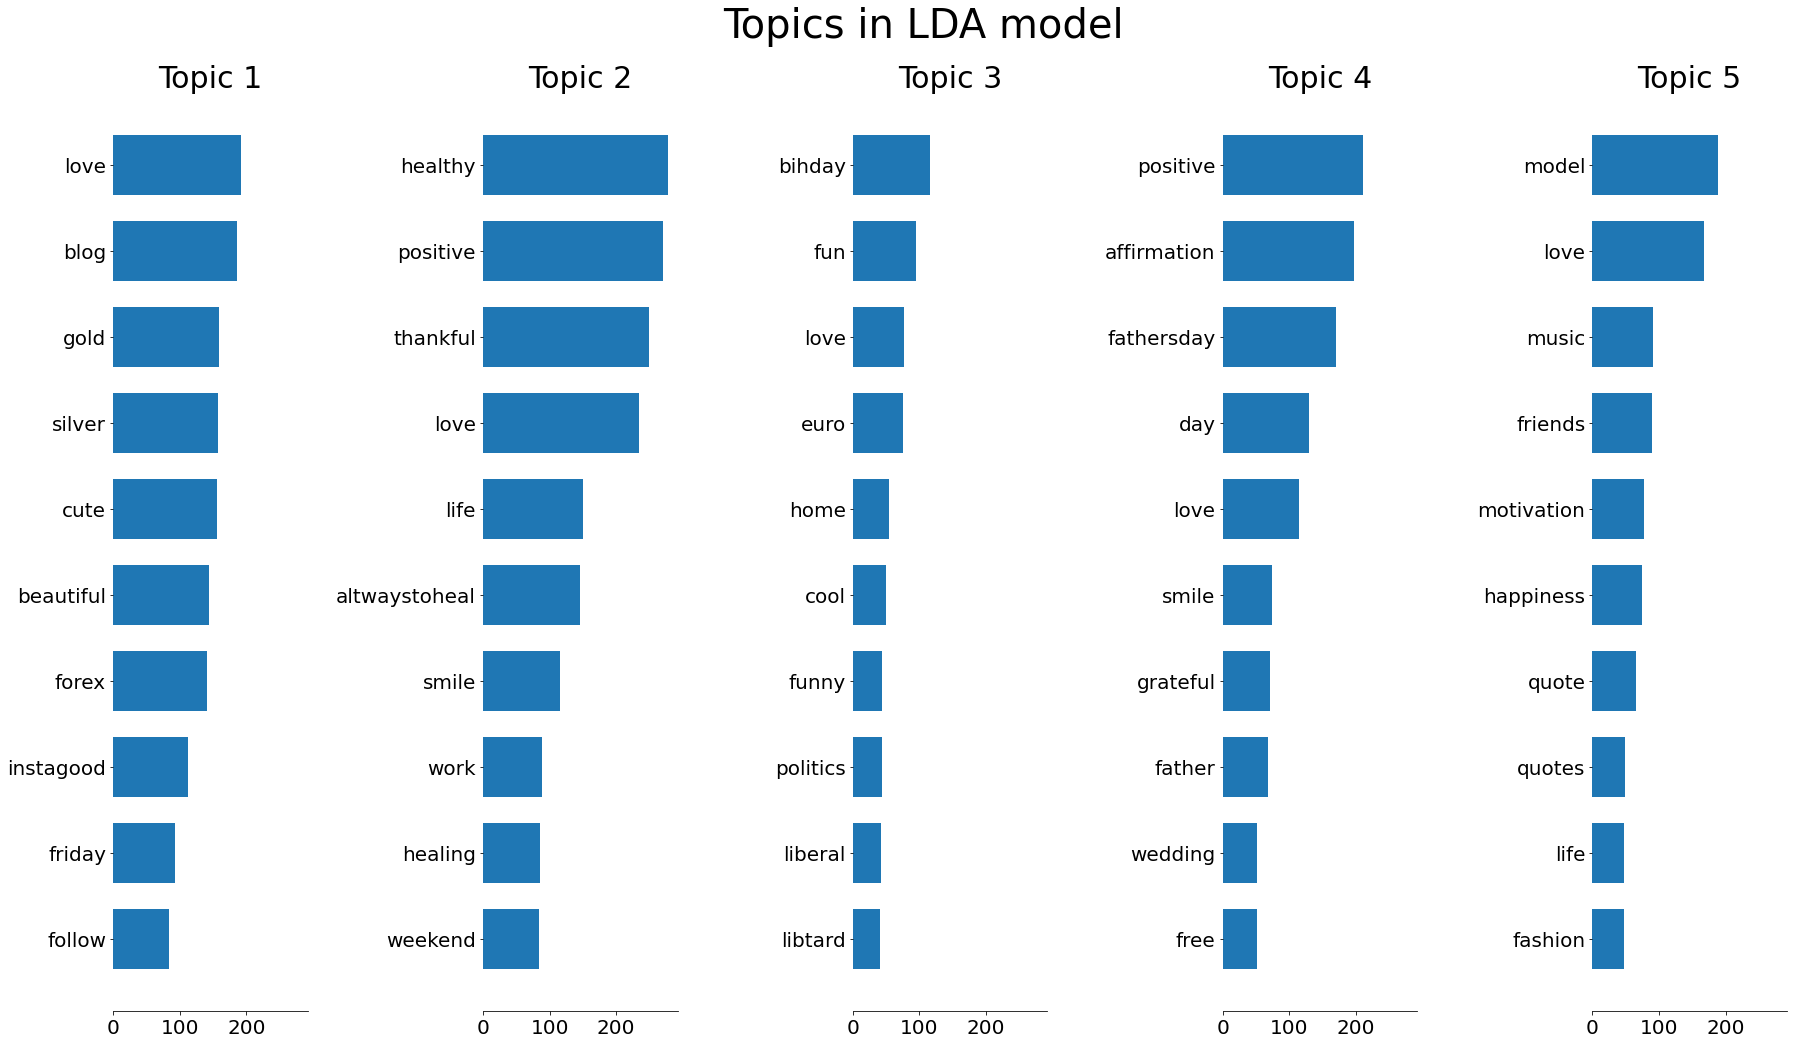

In [193]:
vectorizer = CountVectorizer(stop_words='english')

data_vectorized = vectorizer.fit_transform(df2)

lda = LatentDirichletAllocation(n_components=n_components, random_state=0)

lda.fit(data_vectorized)

feature_names = vectorizer.get_feature_names_out()

plot_top_words(lda, feature_names, n_top_words, 'Topics in LDA model')